Names: Casey Alvarado and Jay Woo

In this notebook, we will try to make map iterations of displaying our data.

In [15]:
import pandas 
import matplotlib.pyplot as plt
import seaborn as sns
import vincent
import numpy as np
%matplotlib inline

In [16]:
df = pandas.read_csv('cleanedData.csv')

In [17]:
df.head()

,Unnamed: 0,Last,First,Ord,T,Status,D/O,Notes,Diocese,Source/Assignments,Ord_Mod
0,0,Abaya,Rubin,0,P,accused,Diocesan,One of seven priests named as defendants in ...,"Los Angeles, CA",Source:United Press International 02.08.84; U...,=
1,1,Abdon,Andrew,0,B,settled,Brothers of the Christian Schools,"In separate 1995 lawsuits, 2 brothers and anot...","Santa Fe, NM",Source:Obituary and Assignments 08.17.77;Orti...,=
2,2,Abercrombie,Leonard A.,1946,P,accused,Diocesan,"Letter 7/93 to Pope JP II, Stafford, and Mahon...","Denver, CO",Source:LA Archdiocesan Report 2.17.04 page 3;M...,=
3,3,Abeywickrema,Lionel Augustine,1951,P,accused,Diocesan,"Abeywickrema, originally from Sri Lanka, was a...","Santa Fe, NM",Source:Roswell Daily Record 7.1.93;The New Mex...,=
4,4,Abrams,John L.,1950,P,accused,Diocesan,"Some time after 2002 Abrams' ""victims"" report...","Brooklyn, NY",Source:Statement by Diocese of Brooklyn 11.08...,<


In [21]:
from state_dict import *

states = {};

for l in df.Diocese:
    state = l.split(", ")[1]
    if state in state_dict:
        state = state_dict[state]
    else:
        continue
    
    if state in states.keys():
        states[state]+=1; 
    else: 
        states[state] =1; 

print states

{'Mississippi': 8, 'Oklahoma': 8, 'Delaware': 38, 'Minnesota': 187, 'Alaska': 54, 'Illinois': 238, 'Arkansas': 2, 'New Mexico': 71, 'Indiana': 47, 'Maryland': 69, 'Louisiana': 75, 'Texas': 127, 'Wyoming': 2, 'Tennessee': 17, 'Iowa': 82, 'Wisconsin': 121, 'Arizona': 61, 'Michigan': 112, 'Kansas': 21, 'Utah': 4, 'Virginia': 22, 'Oregon': 93, 'Connecticut': 90, 'Montana': 50, 'New Hampshire': 90, 'Massachusetts': 376, 'West Virginia': 6, 'South Carolina': 12, 'California': 503, 'Vermont': 15, 'Georgia': 8, 'North Dakota': 13, 'Pennsylvania': 278, 'Florida': 101, 'Hawaii': 18, 'Kentucky': 99, 'Rhode Island': 35, 'Nebraska': 15, 'Missouri': 108, 'Ohio': 137, 'Alabama': 14, 'South Dakota': 32, 'Colorado': 29, 'Idaho': 7, 'New Jersey': 148, 'Washington': 91, 'North Carolina': 14, 'New York': 297, 'District of Columbia': 26, 'Nevada': 6, 'Maine': 49}


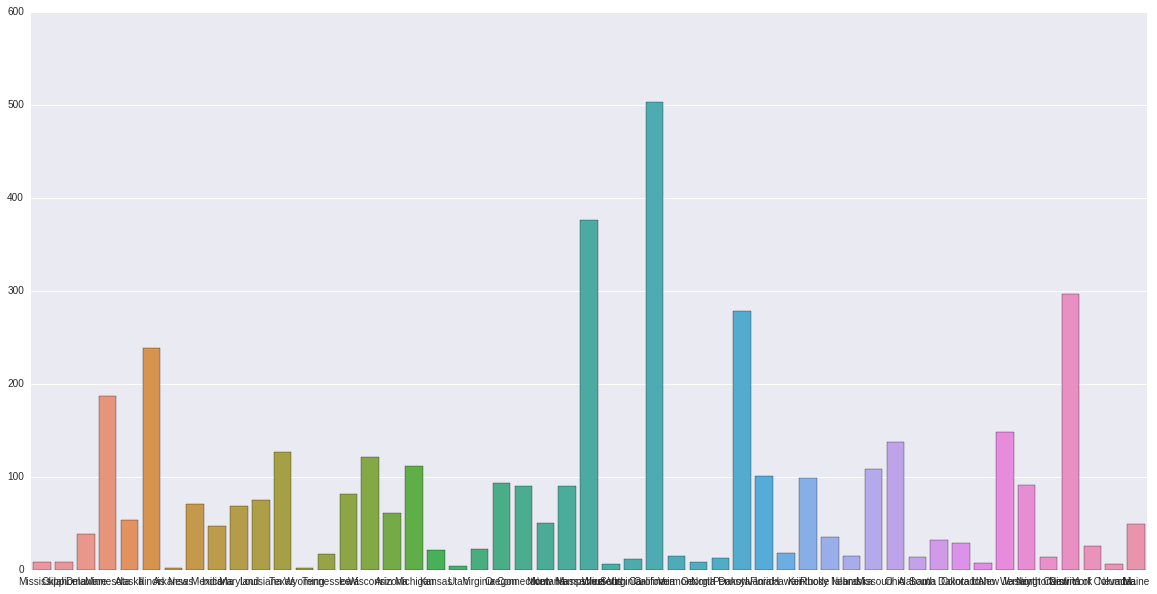

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(x=states.keys(), y=states.values())

In [23]:
states_df = pandas.DataFrame(states.items(), columns=['State', 'Count'])
states_df.head()

,State,Count
0,Mississippi,8
1,Oklahoma,8
2,Delaware,38
3,Minnesota,187
4,Alaska,54


# Iteration #1: Using Vincent

Vincent allows python to use Vega, which builds on D3. 

In [28]:
vincent.core.initialize_notebook()

state_topo = r'us_states.topo.json'
geo_data = [{'name': 'states',
             'url': state_topo,
             'feature': 'us_states.geo'}
             ]
vis = vincent.Map(data=states_df, geo_data=geo_data, scale=1000, projection='albersUsa',
                 data_bind='Count', data_key='State',
                 map_key={'states': 'properties.NAME'})

vis.to_json('vega.json')
vis.scales[0].type='threshold'
vis.scales['color'].type = 'threshold'
vis.scales['color'].domain = [0, 100, 200, 300,  400,  500, 600]
vis.display()

# Iteration #2: Using Bokeh

from tutorial:http://bokeh.pydata.org/en/latest/docs/gallery/texas.html

In [ ]:
from bokeh.models import HoverTool
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment

counties = {
    code: county for code, county in counties.items() if county["state"] == "tx"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

colors = ["#F1EEF6", "#D4B9DA", "#C994C7", "#DF65B0", "#DD1C77", "#980043"]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
county_colors = [colors[int(rate/3)] for rate in county_rates]

source = ColumnDataSource(data=dict(
    x=county_xs,
    y=county_ys,
    color=county_colors,
    name=county_names,
    rate=county_rates,
))

TOOLS="pan,wheel_zoom,box_zoom,reset,hover,save"

p = figure(title="Texas Unemployment 2009", tools=TOOLS)

p.patches('x', 'y', source=source,
          fill_color='color', fill_alpha=0.7,
          line_color="white", line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("Unemployment rate)", "@rate%"),
    ("(Long, Lat)", "($x, $y)"),
]

output_file("texas.html", title="texas.py example")

show(p)